ODE with instabilities is given by
 \begin{eqnarray} y' &=& \frac{-1}{t^2} + \alpha*\left(y - \frac{1}{t} \right), \quad \alpha>0, \quad 1<t<10, \\
 y(1) &=& 1. \end{eqnarray}
 
 The exact solution is $$ y = \frac{1}{t}.$$
 
 However, there is an inherent instability in the model.
 
 We compare the following solution methods:
 

 1. RKF45 - Explicit Adaptive Runge-Kutta-Fehlberg (use ode45) 
 2. BDF1 - Implicit Backward Euler with fixed time step
 3. BDFn - Implicit Adaptive BDF (use ode15s)

Load libraries and set initial conditions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

t0 = 1; tf = 10; y0 = [1.] #initial conditions and final time
alpha = [10.];
t_span = [1., 10.]

Solve using explicit RKF45

Text(0, 0.5, 'y(t)')

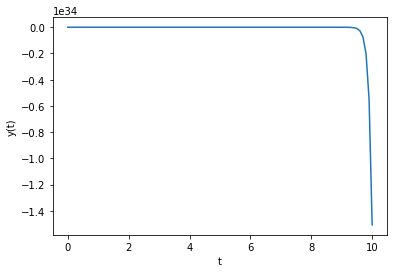

In [2]:
def unstable(t,y,alpha):
    y = -1/t**2 + alpha*(y - 1/t)
    return y
# solve
sol = solve_ivp(unstable, t_span, y0, args=alpha, method='RK45', dense_output=True)
# plot
t = np.linspace(0, 10, 100)
y = sol.sol(t)
plt.plot(t, y.T)
plt.xlabel('t')
plt.ylabel('y(t)')

Solve using implicit, variable order BDF method

Text(0, 0.5, 'y(t)')

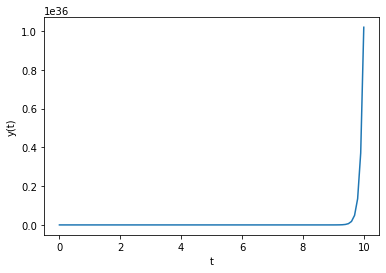

In [3]:
# solve
sol = solve_ivp(unstable, t_span, y0, args=alpha, method='BDF', dense_output=True)
# plot
t = np.linspace(0, 10, 100)
y = sol.sol(t)
plt.plot(t, y.T)
plt.xlabel('t')
plt.ylabel('y(t)')

Finally, try a fixed-step, implicit backward Euler method.

In [4]:
def backward_euler ( f, tspan, y0, n ):
  from scipy.optimize import fsolve

  if ( np.ndim ( y0 ) == 0 ):
    m = 1
  else:
    m = len ( y0 )

  t = np.zeros ( n + 1 )
  y = np.zeros ( [ n + 1, m ] )

  dt = ( tspan[1] - tspan[0] ) / float ( n )

  #t[0] = 0.0;
  t[0] = tspan[0];
  y[0,:] = y0

  for i in range ( 0, n ):
    to = t[i]
    yo = y[i,:]
    tp = t[i] + dt
    yp = yo + dt * f ( to, yo )

    yp = fsolve ( backward_euler_residual, yp, args = ( f, to, yo, tp ) )

    t[i+1]   = tp
    y[i+1,:] = yp[:]
  return t, y

def backward_euler_residual ( yp, f, to, yo, tp ):
  value = yp - yo - ( tp - to ) * f ( tp, yp );
  return value

Text(0, 0.5, 'y(t)')

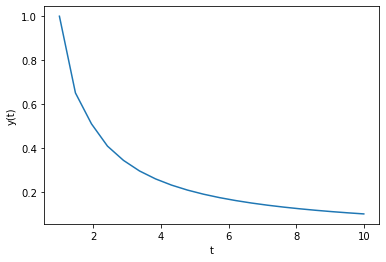

In [5]:
def unstable2(t,y):
    y = -1/t**2 + 10.*(y - 1/t)
    return y
  
#t_span = np.array ( [ 1.0, 10.0 ] )
t_span = [ 1.0, 10.0 ] 
y0 = 1.
n = 19
t2, y2 = backward_euler(unstable2, t_span, y0, n )
# plot
plt.plot(t2, y2)
plt.xlabel('t')
plt.ylabel('y(t)')